<a href="https://www.kaggle.com/code/shaheerhussain/bitcoin-analysis?scriptVersionId=146836768" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db= pd.read_csv("/kaggle/input/bitcoin-usd-btc-usd/BTC-USD(2).csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3101,2023-03-15,24770.925781,25240.615234,23964.910156,24375.960938,24375.960938,43655701450
3102,2023-03-16,24373.457031,25190.326172,24225.111328,25052.789063,25052.789063,33866061747
3103,2023-03-17,25055.123047,27787.812500,24955.169922,27423.929688,27423.929688,50730261335
3104,2023-03-18,27448.117188,27725.953125,26636.261719,26965.878906,26965.878906,35723036817


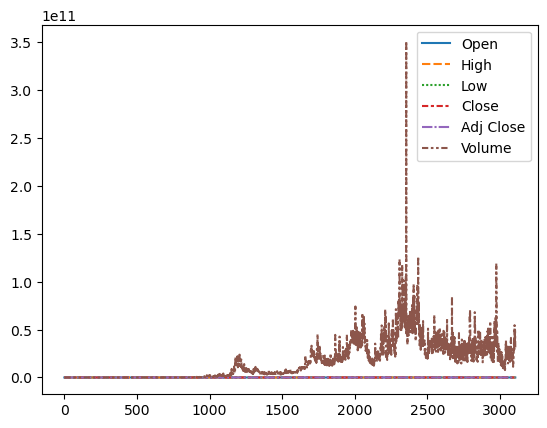

In [3]:
display(db)
sns.lineplot(data = db )
plt.show()

from above chart we can clearly see that there are lots of date entries so we have to slpit it into months and year 

In [4]:
print(db["Date"].dtypes)
db["Date"] = pd.to_datetime(db["Date"])
print(db["Date"].dtypes)

object
datetime64[ns]


In [5]:
db["Year"]=db["Date"].dt.year
db["Month"]=db["Date"].dt.month
db["year_month"]=db["Date"].dt.strftime('%y-%m')
db['quarter_column'] = db['Date'].dt.quarter
db['year_quarter_column'] =db["Date"].dt.year.astype(str)+"Q"+db['Date'].dt.quarter.astype(str)
print(db)

           Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
3101 2023-03-15  24770.925781  25240.615234  23964.910156  24375.960938   
3102 2023-03-16  24373.457031  25190.326172  24225.111328  25052.789063   
3103 2023-03-17  25055.123047  27787.812500  24955.169922  27423.929688   
3104 2023-03-18  27448.117188  27725.953125  26636.261719  26965.878906   
3105 2023-03-19  27011.664063  27331.921875  26931.964844  27033.316406   

         Adj Close       Volume  Year  Month year_month  quarter_column  \
0       457.334015     2

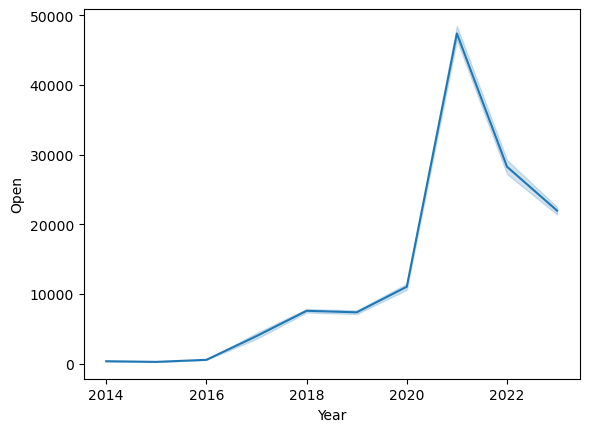

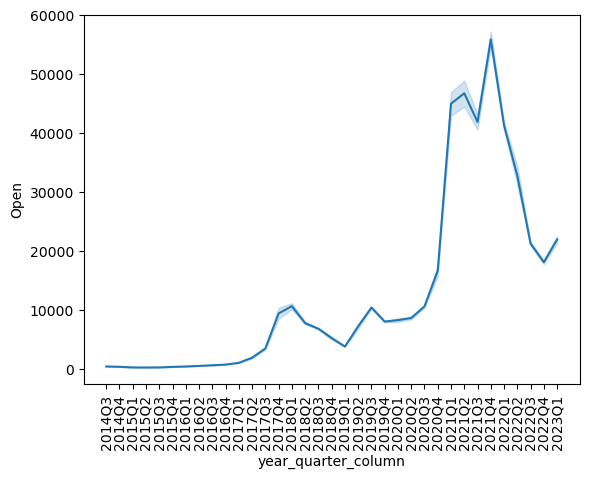

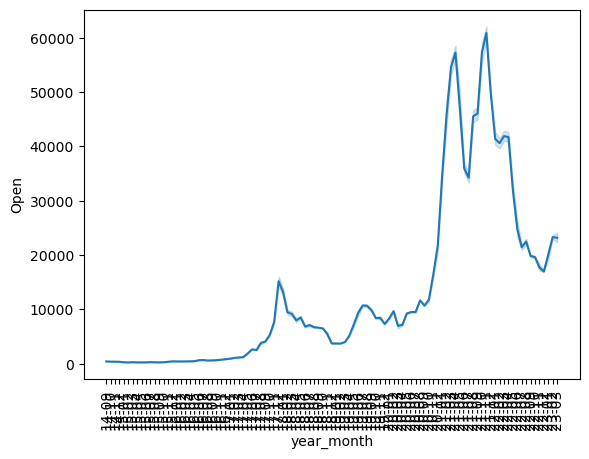

In [6]:
sns.lineplot(x="Year",y="Open",data = db )
plt.show()
sns.lineplot(x="year_quarter_column",y="Open",data = db )
plt.xticks(rotation=90)
plt.show()
sns.lineplot(x="year_month",y="Open",data = db )
plt.xticks(rotation=90)
plt.show()

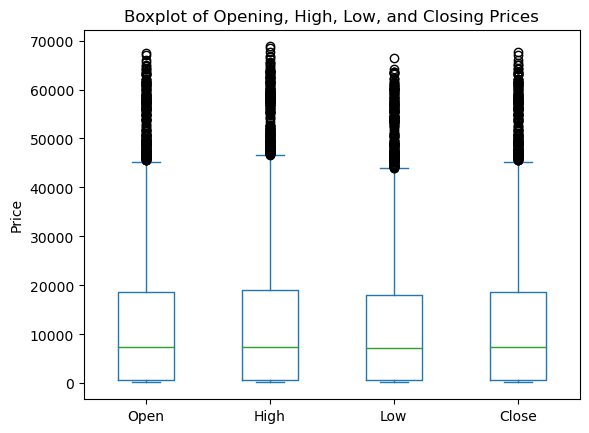

In [7]:
# Create a boxplot of the opening, high, low, and closing prices
fig, ax = plt.subplots()
db[['Open', 'High', 'Low', 'Close']].plot(kind='box', ax=ax)

# Set the title and axis labels
ax.set_title('Boxplot of Opening, High, Low, and Closing Prices')
ax.set_ylabel('Price')

# Show the plot
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


/opt/conda/lib/python3.7/site-packages/mplfinance/_arg_validators.py:94: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


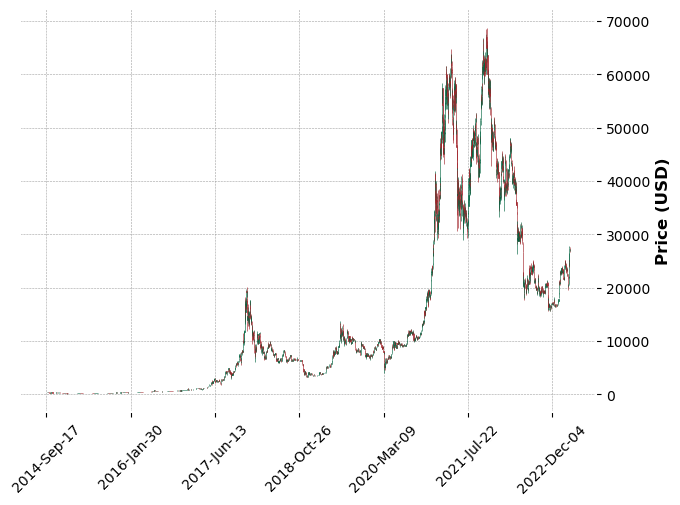

In [8]:
!pip install mplfinance
import mplfinance as mpf

db['Date'] = pd.to_datetime(db['Date'])
db.set_index('Date', inplace=True)

# Create a candlestick chart
mpf.plot(db, type='candle', style='charles', ylabel='Price (USD)')